## Computational scaling of SVMs
1. Write a python function from which you can generate synthetic datasets of an arbitrary size (e.g. a mixture model of two Gaussians)
2. By training SVMs on datasets of different sizes show:
3. how the training time scales.
4. how the classification time scales (on a sample of 1000 unseen datapoints).
5. the accuracy of the classifier (on a sample of 1000 unseen datapoints).

Choose a kernel that you think is appropriate to the task at hand. Come to class with your code and results in a plaintext format suitable for pasting into a poll.

## Data generation scheme

In [166]:
gauss1 = {'mean': 10, 'sd': 15}
gauss2 = {'mean': 30, 'sd': 5}

In [167]:
import numpy as np

def norm_distr(x, gs):
    mean = gs['mean']
    sd = gs['sd']
    
    exp = np.exp(-(x - mean)**2 / (2*sd**2))
    val = 1 / np.sqrt(2*np.pi*sd) * exp
    
    return val

def generate_data(count, gs1, gs2, gap=0.3, start=-10, stop=50):
    noise = np.random.normal(0, 0.1, count)
    feat1 = np.linspace(start, stop, count) + noise
    feat2 = norm_distr(feat1, gs1) + norm_distr(feat1, gs2) + noise # Gaussian mixture
    
    data = np.concatenate([feat1.reshape((-1, 1)), feat2.reshape((-1, 1))], axis=1)
    
    class1_idx = np.random.choice(count, int(count / 2))
    class1 = np.concatenate([data[class1_idx, :], np.zeros((len(class1_idx), 1))], axis=1)
    
    class2 = np.delete(data, class1_idx, axis=0) # anti-subset
    class2 = np.concatenate([class2, np.ones((class2.shape[0], 1))], axis=1)
    class2[:, 1] += gap
    
    fin_data = np.concatenate([class1, class2], axis=0)
    np.random.shuffle(fin_data)
    
    return fin_data

In [168]:
gen_data = generate_data(100, gauss1, gauss2)
data = gen_data[:, :2]
targets = gen_data[:, -1]

## Visualizing generated data

In [169]:
from matplotlib import pyplot as plt

def viz(data, targets):
    blue_x1 = []
    blue_x2 = []
    red_x1 = []
    red_x2 = []
    
    for i in range(data.shape[0]):
        if targets[i] == 0.0:
            blue_x1.append(data[i][0])
            blue_x2.append(data[i][1])
        else:
            red_x1.append(data[i][0])
            red_x2.append(data[i][1])
            
    plt.figure(figsize=(10, 6))
    plt.scatter(blue_x1, blue_x2, color="blue")
    plt.scatter(red_x1, red_x2, color="red")
    plt.show()

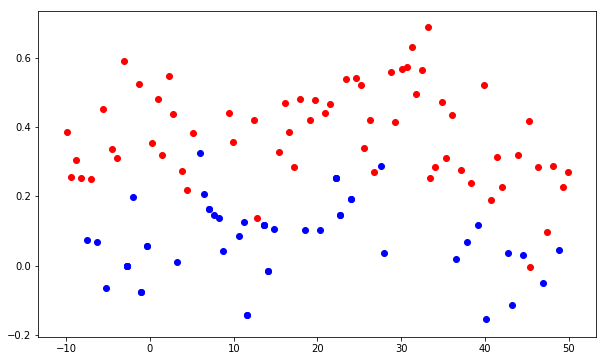

In [170]:
viz(data, targets)

## Training an SVM on datasets

In [174]:
data_sizes = [10, 100, 500, 1000, 5000, 10000]

In [175]:
# test data
gen_data = generate_data(1000, gauss1, gauss2)
test_data = gen_data[:, :2]
test_targets = gen_data[:, -1]

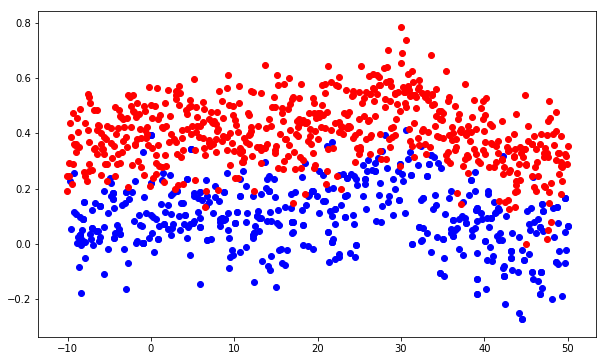

In [179]:
viz(test_data, test_targets)

In [178]:
from time import time
from sklearn import svm
from sklearn.metrics import accuracy_score

train_times = []
clf_times = []
accs = []

for sz in data_sizes:
    # generating data
    gen_data = generate_data(sz, gauss1, gauss2)
    data = gen_data[:, :2]
    targets = gen_data[:, -1]
    
    clf = svm.SVC(gamma='auto', kernel='rbf') # initializing a support-vector machine with RBF kernel
    start = time()
    clf.fit(data, targets)
    end = time()
    train_times.append(end - start)
    
    start = time()
    pred = clf.predict(test_data)
    end = time()
    clf_times.append(end - start)
    
    accs.append(accuracy_score(test_targets, pred))
    
    print("Dataset size: {3}\nTraining time: {0}\nClassification time: {1}\nAccuracy: {2}\n".format(
        train_times[-1], clf_times[-1], accs[-1], sz))

Dataset size: 10
Training time: 0.0009479522705078125
Classification time: 0.0017900466918945312
Accuracy: 0.5218181818181818

Dataset size: 100
Training time: 0.0013039112091064453
Classification time: 0.0039670467376708984
Accuracy: 0.5290909090909091

Dataset size: 500
Training time: 0.011943817138671875
Classification time: 0.009929895401000977
Accuracy: 0.6563636363636364

Dataset size: 1000
Training time: 0.04802107810974121
Classification time: 0.029092788696289062
Accuracy: 0.8681818181818182

Dataset size: 5000
Training time: 0.5664858818054199
Classification time: 0.04833984375
Accuracy: 0.9354545454545454

Dataset size: 10000
Training time: 2.134493112564087
Classification time: 0.08397889137268066
Accuracy: 0.9254545454545454

